## 🎲 Python Lab: Supervised Learning - Classification
Support Vector Machines
> [Principles of ML course](https://github.com/mnarimani/PML_Spring2025_SUT) - Spring 2025 - Sharif <br>
> Lab sessions - Session 7 - April 12, 2025 <br>
> Author: M Narimani <br>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/mnarimani/PML_Spring2025_SUT/blob/main/Week07/01_SVM_TODO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/mnarimani/PML_Spring2025_SUT/blob/main/Week07/01_SVM_TODO.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## 🛠️ Setup: Importing Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Set random seed for reproducibility
np.random.seed(42)

## 1️⃣ Linear SVM - The Maximum Margin Classifier

In [7]:
def plot_svm_decision_boundary(X, y, svm_model=None, ax=None):
    if ax is None:
        ax = plt.gca()
    
    # Create a mesh grid
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.25, X[:, 0].max() + 0.25
    y_min, y_max = X[:, 1].min() - 0.25, X[:, 1].max() + 0.25
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Plot the decision boundary
    if svm_model:
        Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.3)
    
    # Plot the data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['red', 'blue']), edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
    # If we have a model, also plot the support vectors
    if svm_model:
        # Plot the support vectors
        support_vectors = svm_model.support_vectors_
        ax.scatter(support_vectors[:, 0], support_vectors[:, 1], 
                   s=100, facecolors='none', edgecolors='k')
    
    return ax

#### Example 1: Linearly Separable Dataset

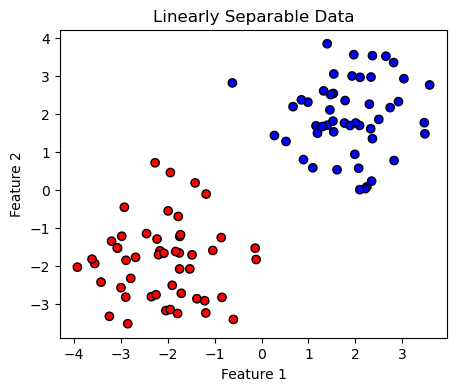

In [9]:
# Generate a simple linearly separable dataset
def generate_linearly_separable_data(n_samples=100):
    # Generate points for the first class
    X1 = np.random.randn(n_samples//2, 2) + np.array([2, 2])
    # Generate points for the second class
    X2 = np.random.randn(n_samples//2, 2) + np.array([-2, -2])
    
    X = np.vstack([X1, X2])
    y = np.hstack([np.ones(n_samples//2), -np.ones(n_samples//2)])
    
    return X, y

X, y = generate_linearly_separable_data(100)

plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['red', 'blue']), edgecolors='k')
plt.title('Linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 2️⃣ Linear SVM from Scratch

In [ ]:
class LinearSVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iterations = n_iterations
        self.w = None
        self.b = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0
        
        # Gradient descent
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                # Check if the point is correctly classified
                condition = y[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                
                if condition:
                    # Correctly classified, update only for regularization
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # Incorrectly classified, update weights and bias
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * (-y[idx])
        
        return self
    
    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

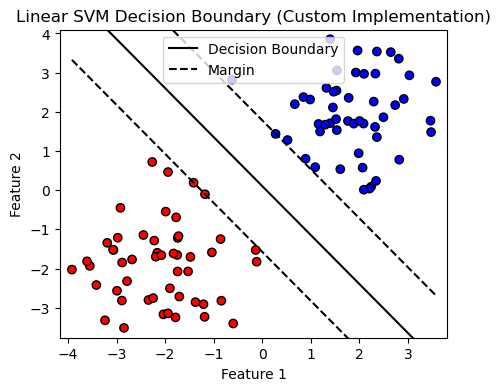

In [11]:
# Train the SVM model
svm = LinearSVM(learning_rate=0.001, n_iterations=1000)
svm.fit(X, y)

# Visualize the decision boundary
plt.figure(figsize=(5, 4))
plot_svm_decision_boundary(X, y, None)  # First without the decision boundary

# Get decision boundary
a = -svm.w[0] / svm.w[1]
xx = np.linspace(X[:, 0].min(), X[:, 0].max())
yy = a * xx - (svm.b) / svm.w[1]

# Plot decision boundary and margins
plt.plot(xx, yy, 'k-', label='Decision Boundary')
margin = 1 / np.sqrt(np.sum(svm.w ** 2))
yy_down = yy - np.sqrt(1 + a**2) * margin
yy_up = yy + np.sqrt(1 + a**2) * margin
plt.plot(xx, yy_down, 'k--', label='Margin')
plt.plot(xx, yy_up, 'k--')

plt.title('Linear SVM Decision Boundary (Custom Implementation)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## 3️⃣ Using `scikit-learn` for SVM

In [13]:
from sklearn.svm import SVC

> **TODO**: Create an SVC model with a linear kernel and fit it to the data

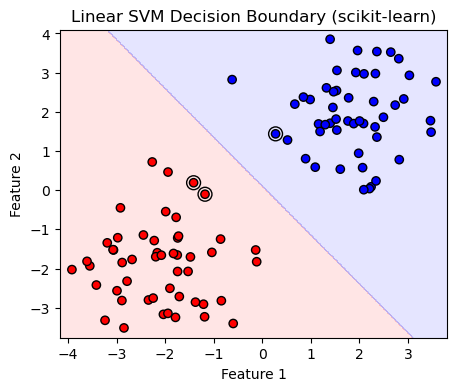

In [15]:
# YOUR CODE HERE
# model = SVC(...)
# model.fit(...)

# Visualize the decision boundary
plt.figure(figsize=(5, 4))
plot_svm_decision_boundary(X, y, model)
plt.title('Linear SVM Decision Boundary (scikit-learn)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 4️⃣ Non-linear SVM with Kernel Trick

#### Example 2: Circle dataset

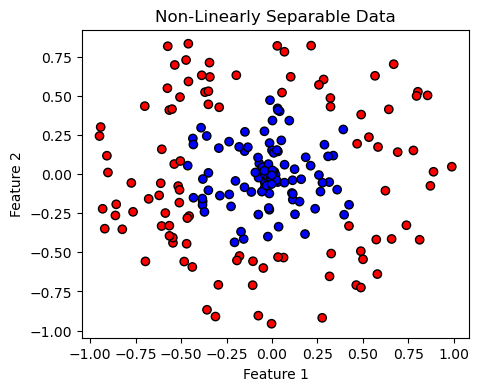

In [17]:
# Generate a non-linearly separable dataset
def generate_circle_dataset(n_samples=100, factor=0.5):
    
    # Class 1: points inside the circle
    radius = np.random.random(n_samples//2) * factor
    angles = np.random.random(n_samples//2) * 2 * np.pi
    X1 = np.concatenate([radius[:, np.newaxis] * np.cos(angles)[:, np.newaxis],
                         radius[:, np.newaxis] * np.sin(angles)[:, np.newaxis]], axis=1)
    
    # Class 2: points outside the circle
    radius = 0.5 + np.random.random(n_samples//2) * (1 - factor)
    angles = np.random.random(n_samples//2) * 2 * np.pi
    X2 = np.concatenate([radius[:, np.newaxis] * np.cos(angles)[:, np.newaxis],
                         radius[:, np.newaxis] * np.sin(angles)[:, np.newaxis]], axis=1)
    
    X = np.vstack([X1, X2])
    y = np.hstack([np.ones(n_samples//2), -np.ones(n_samples//2)])
    
    return X, y

X_nonlinear, y_nonlinear = generate_circle_dataset(200, factor=0.5)

plt.figure(figsize=(5, 4))
plt.scatter(X_nonlinear[:, 0], X_nonlinear[:, 1], c=y_nonlinear, 
            cmap=ListedColormap(['red', 'blue']), edgecolors='k')
plt.title('Non-Linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

> **TODO**: Try to use a linear SVM on this non-linear data

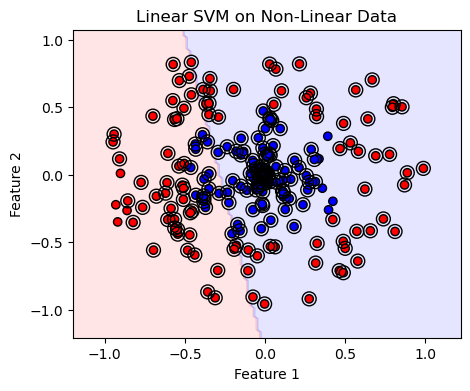

In [19]:
# YOUR CODE HERE
# linear_model = SVC(...)
# linear_model.fit(...)

plt.figure(figsize=(5, 4))
plot_svm_decision_boundary(X_nonlinear, y_nonlinear, linear_model)
plt.title('Linear SVM on Non-Linear Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Now let's use a non-linear kernel (RBF - Radial Basis Function)

> **TODO**: Create an SVC model with an RBF kernel and fit it to the non-linear data

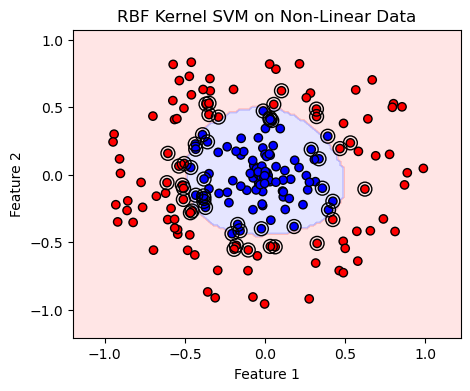

In [22]:
# YOUR CODE HERE
# rbf_model = SVC(...)
# rbf_model.fit(...)

plt.figure(figsize=(5, 4))
plot_svm_decision_boundary(X_nonlinear, y_nonlinear, rbf_model)
plt.title('RBF Kernel SVM on Non-Linear Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 5️⃣ Effects of Parameter $C$

The $C$ parameter controls the trade-off between having a smooth decision boundary
and correctly classifying training points

> **TODO**: Experiment with different values of C (regularization parameter) <br>
> and observe how it affects the decision boundary

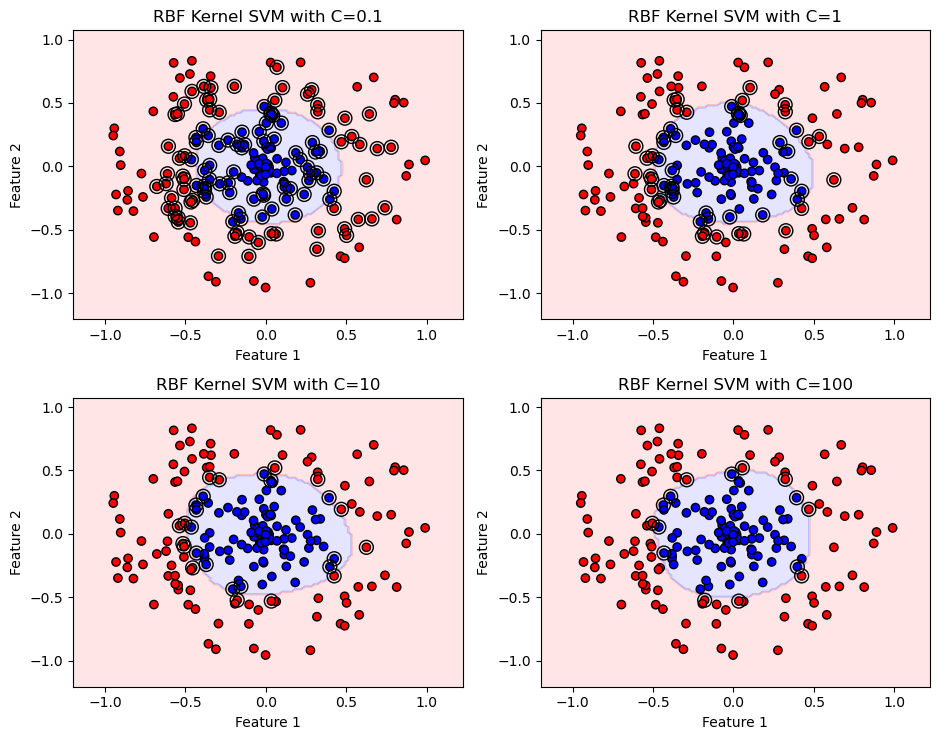

In [24]:
# YOUR CODE HERE
# C_values = [...]
# models = [...]
# 
# for model in models: ...

# Plot decision boundaries
fig, axes = plt.subplots(2, 2, figsize=(9.5, 7.5))
axes = axes.flatten()

for i, (C, model) in enumerate(zip(C_values, models)):
    plot_svm_decision_boundary(X_nonlinear, y_nonlinear, model, ax=axes[i])
    axes[i].set_title(f'RBF Kernel SVM with C={C}')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

## 6️⃣ Effects of Parameter $\gamma$ for RBF Kernel

The gamma parameter defines how far the influence of a single training example reaches <br>
- Low values = far reach,
- high values = close reach

> **TODO**: Experiment with different values of gamma and observe the effects

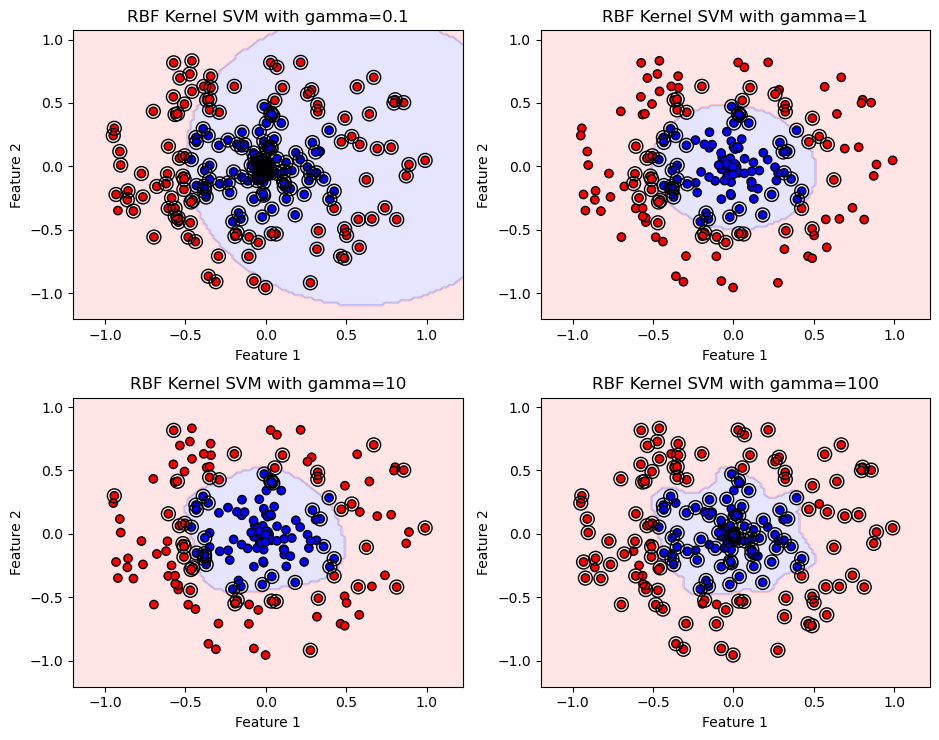

In [26]:
# YOUR CODE HERE
# gamma_values = [...]
# models = [...]
# 
# for model in models: ...

# Plot decision boundaries
fig, axes = plt.subplots(2, 2, figsize=(9.5, 7.5))
axes = axes.flatten()

for i, (gamma, model) in enumerate(zip(gamma_values, models)):
    plot_svm_decision_boundary(X_nonlinear, y_nonlinear, model, ax=axes[i])
    axes[i].set_title(f'RBF Kernel SVM with gamma={gamma}')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

## 📝 Exercises

> **Exercise 1**: Implement the Dual Formulation of SVM
> - Use a quadratic programming solver (like CVXOPT)
> - Compare results with the scikit-learn implementation

> **Exercise 2**: Grid Search for Hyperparameter Tuning
>   - Implement a grid search to find optimal values of C and gamma
>   - Use cross-validation to evaluate performance

> **Exercise 3**: Multi-Class Classification
>   - Apply SVM to a multi-class dataset (like Iris)
>   - Compare One-vs-One and One-vs-Rest strategies

> **Exercise 4**: Feature Selection
>   - Design a feature selection method based on SVM
>   - Apply it to the breast cancer dataset and analyze the results

> **Exercise 5**: Advanced: Implement Custom Kernels
>   - Create a custom kernel function
>   - Apply it to a non-linearly separable dataset